In [118]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [119]:
def compute_bow(documents, max_features):
    """
    Computes the bag-of-words matrix for the given documents.

    Parameters:
    - documents: List of text documents.
    - max_features: Maximum number of features (vocabulary size).

    Returns:
    - bow_matrix: Sparse matrix of shape (n_samples, n_features).
    """
    # TODO: Implement me!
    vectorizer = CountVectorizer(max_features=max_features)
    bow_matrix = vectorizer.fit_transform(documents)
    return bow_matrix

In [120]:
def compute_tfidf(documents, max_features):
    """
    Computes the tfidf matrix for the given documents.

    Parameters:
    - documents: List of text documents.
    - max_features: Maximum number of features to use.

    Returns:
    - tfidf_matrix: Sparse matrix of shape (n_samples, n_features).
    """
    # TODO: Implement me!
    vectorizer = TfidfVectorizer(max_features=max_features)
    tfidf_matrix = vectorizer.fit_transform(documents)
    feature_names = vectorizer.get_feature_names_out()  # Extract feature names
    return tfidf_matrix, feature_names

In [121]:
def apply_lsa(tfidf_matrix, n_components):
    """
    Applies LSA (using TruncatedSVD) to the tfidf matrix.

    Parameters:
    - tfidf_matrix: Sparse matrix from tfidf vectorization.
    - n_components: Number of components to keep.

    Returns:
    - lsa_matrix: Dense matrix with reduced dimensions.
    """
    # TODO: Implement me!
    vectorizer = TruncatedSVD(n_components=n_components)
    lsa_matrix = vectorizer.fit_transform(tfidf_matrix)
    return lsa_matrix

In [122]:
def create_documents(df):
  documents = df['review'].tolist()
  return documents

In [123]:
def create_labels(df):
  labels = df['voted_up'].tolist()
  return labels

In [124]:
max_features = 1000

In [125]:
df = pd.read_csv('cleaned_data.csv')
documents = create_documents(df)
labels = create_labels(df)
bow_matrix = compute_bow(documents, 1000)
print("Bag of words matrix:")
print(bow_matrix)

tfidf_matrix, feature_names = compute_tfidf(documents, 1000)
print("TF-IDF matrix:")
print(tfidf_matrix)

lsa_matrix = apply_lsa(tfidf_matrix, 100)
print("LSA matrix:")
print(lsa_matrix)

Bag of words matrix:
  (0, 417)	1
  (0, 971)	1
  (0, 490)	1
  (0, 862)	1
  (0, 135)	1
  (0, 343)	1
  (0, 966)	1
  (0, 648)	1
  (0, 128)	1
  (0, 131)	1
  (0, 660)	1
  (0, 463)	2
  (0, 51)	1
  (0, 368)	1
  (0, 915)	1
  (1, 541)	1
  (1, 654)	1
  (2, 862)	1
  (2, 343)	1
  (2, 51)	1
  (2, 98)	1
  (2, 670)	1
  (2, 819)	1
  (2, 927)	1
  (2, 396)	1
  :	:
  (644, 32)	2
  (644, 91)	1
  (644, 238)	3
  (644, 981)	1
  (644, 801)	2
  (644, 826)	2
  (644, 689)	1
  (644, 877)	1
  (644, 230)	2
  (644, 895)	1
  (644, 6)	1
  (644, 977)	1
  (644, 647)	1
  (644, 874)	1
  (644, 255)	1
  (644, 740)	1
  (644, 292)	1
  (644, 964)	1
  (644, 249)	1
  (644, 679)	1
  (644, 442)	1
  (644, 297)	1
  (644, 52)	1
  (644, 768)	1
  (644, 199)	1
TF-IDF matrix:
  (0, 915)	0.20697798933682954
  (0, 368)	0.25427004166709494
  (0, 51)	0.12462977635738053
  (0, 463)	0.26507219701157775
  (0, 660)	0.3623983186638821
  (0, 131)	0.16271767020972108
  (0, 128)	0.21510501375173183
  (0, 648)	0.3533130783301173
  (0, 966)	0.24221022

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB



from xgboost import XGBClassifier



In [127]:
def evaluate_knn(features, labels, n_neighbors=5, test_size=0.2):
    """
    Splits the dataset, trains a kNN classifier, and evaluates performance.

    Parameters:
    - features: Feature matrix (can be tfidf or LSA-transformed).
    - labels: Ground truth labels.
    - n_neighbors: Number of neighbors for kNN.
    - test_size: Fraction of data to use for testing.

    Returns:
    - accuracy: Accuracy score on the test set.
    """
    trainX, testX, trainY, testY = train_test_split(features, labels, test_size=test_size)

    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')
    knn.fit(trainX, trainY)

    predict = knn.predict(testX)
    accuracy = accuracy_score(testY, predict)
    print("Accuracy:", accuracy)
    print(classification_report(testY, predict))

    return accuracy, knn  # we return the trained model

In [128]:
def evaluate_decision_tree(X, y, test_size=0.2, max_depth=70):
    """
    Splits the dataset, trains a Decision Tree classifier,
    and evaluates performance.

    Parameters:
    - X: Feature matrix.
    - y: Ground truth labels.
    - test_size: Fraction of data to use for testing.
    - max_depth: Maximum depth of the decision tree.


    Returns:
    - accuracy: Accuracy score on the test set.
    - dt_model: The trained Decision Tree model.
    """
    # 1. Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # 2. Instantiate Model 
    dt_model = DecisionTreeClassifier(
        max_depth=max_depth,
        criterion='gini', 
        min_samples_split=2, 
        min_samples_leaf=1
    )

    # 3. Train
    dt_model.fit(X_train, y_train)

    # 4. Predict
    y_pred = dt_model.predict(X_test)

    # 5. Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Decision Tree (max_depth={max_depth}) Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return accuracy, dt_model

In [129]:
def evaluate_naive_bayes(X, y, test_size=0.2):
    """
    Splits the dataset, trains a Naive Bayes classifier (MultinomialNB),
    and evaluates performance.

    Parameters:
    - X: Feature matrix (may not allow LSA features because negative values).
    - y: Ground truth labels.
    - test_size: Fraction of data to use for testing.

    Returns:
    - accuracy: Accuracy score on the test set.
    - nb_model: The trained Naive Bayes model.
    """
    # 1. Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # 2. Instantiate Model
    nb_model = MultinomialNB()
    # nb_model = GaussianNB()        # uncomment for lsa tfidf

    # 3. Train
    nb_model.fit(X_train, y_train)

    # 4. Predict
    y_pred = nb_model.predict(X_test)

    # 5. Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print("Naive Bayes Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return accuracy, nb_model

In [130]:
def evaluate_xgboost(X, y, test_size=0.2, n_estimators=300, max_depth=6, learning_rate=0.1, subsample=0.8):
    """
    Splits the dataset, trains an XGBoost classifier,
    and evaluates performance.

    Parameters:
    - X: Feature matrix.
    - y: Ground truth labels.
    - test_size: Fraction of data to use for testing.
    - n_estimators: Number of boosting rounds.
    - max_depth: Maximum depth of each tree.
    - learning_rate: Reduce overfitting.
    
    Returns:
    - accuracy: Accuracy score on the test set.
    - xgb_model: The trained XGBoost model.
    """
    # 1. Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # 2. Instantiate XGB model
    xgb_model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
    )

    # 3. Train
    xgb_model.fit(X_train, y_train)

    # 4. Predict
    y_pred = xgb_model.predict(X_test)

    # 5. Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"XGBoost (n_estimators={n_estimators}, max_depth={max_depth}, "
          f"learning_rate={learning_rate}) Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return accuracy, xgb_model


In [134]:
# Run everything

y = create_labels(df)

bow_matrix = compute_bow(documents, max_features)
X_tfidf, feature_names = compute_tfidf(documents, max_features)
X_lsa = apply_lsa(X_tfidf, 100)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(bow_matrix, labels, test_size=0.2, random_state=42)

# accuracy, model = evaluate_knn(X_train, y_train, n_neighbors=5)

# acc_dt, model_dt = evaluate_decision_tree(X_tfidf, y, max_depth=70)

acc_nb, model_nb = evaluate_naive_bayes(X_tfidf, y)

# acc_xgb, model_xgb = evaluate_xgboost(X_tfidf, y)

Naive Bayes Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       129

    accuracy                           1.00       129
   macro avg       1.00      1.00      1.00       129
weighted avg       1.00      1.00      1.00       129



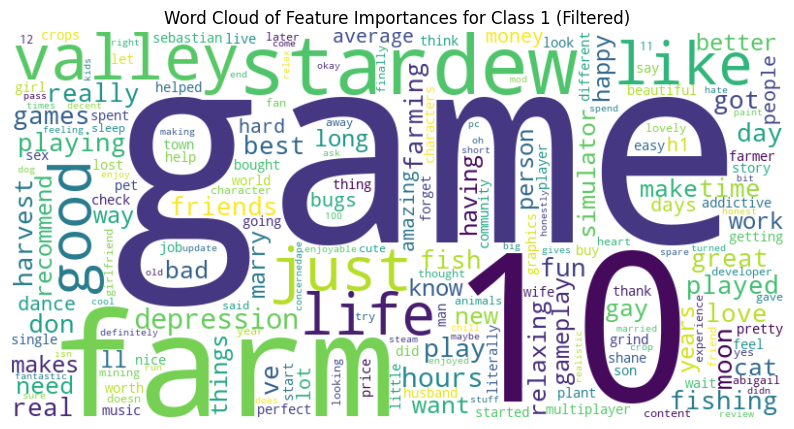

In [139]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Get the log probabilities of features for each class
# Assuming model_nb is a trained MultinomialNB or similar Naive Bayes model
class_log_probs = model_nb.feature_log_prob_

# Focus on one class (e.g., class 1)
class_index = 1  # Change to 0 or 1 depending on the class you want to visualize
feature_importances = np.exp(class_log_probs[class_index])  # Convert log probabilities to probabilities

# Create a dictionary mapping words to their importance
word_importance = {feature_names[i]: feature_importances[i] for i in range(len(feature_names))}

# Filter out stop words
filtered_word_importance = {
    word: importance
    for word, importance in word_importance.items()
    if word not in ENGLISH_STOP_WORDS
}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_word_importance)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud of Feature Importances for Class {class_index} (Filtered)')
plt.show()

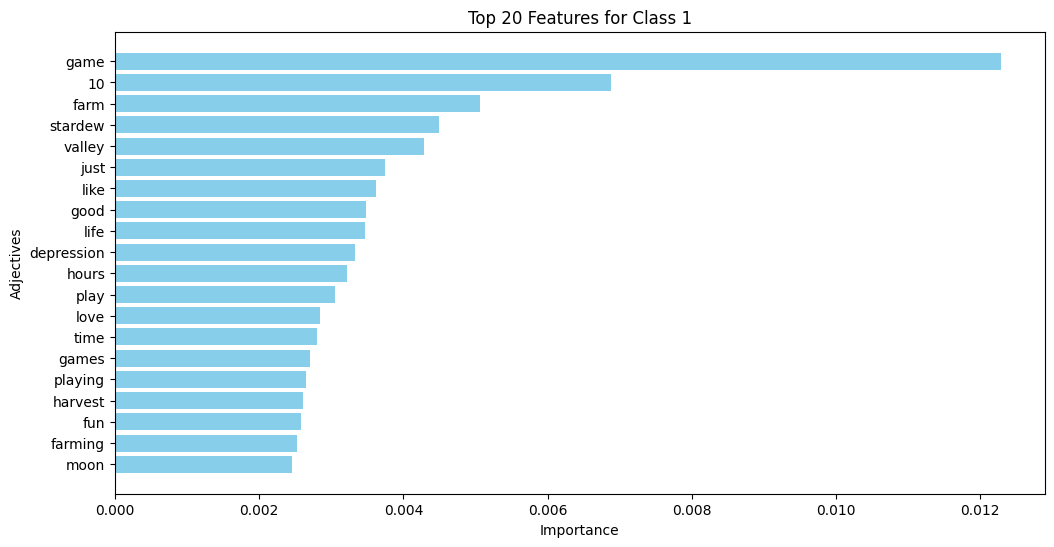

In [154]:
import pandas as pd

# Convert the adjective importance dictionary to a DataFrame
adjective_df = pd.DataFrame(list(filtered_word_importance.items()), columns=['Word', 'Importance'])

# Sort by importance and select the top N features
top_n = 20
top_adjectives = adjective_df.sort_values(by='Importance', ascending=False).head(top_n)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_adjectives['Word'], top_adjectives['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.xlabel('Importance')
plt.ylabel('Adjectives')
plt.title(f'Top {top_n} Features for Class {class_index}')
plt.show()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\0979h\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\0979h\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\0979h\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\0979h\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\0979h\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipp

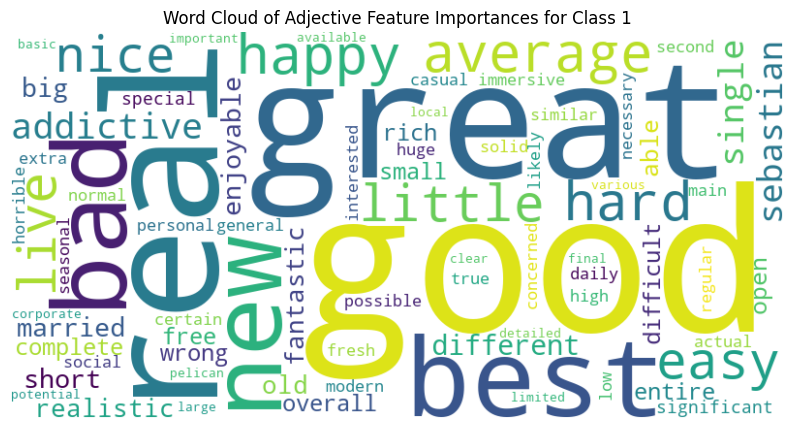

In [143]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk
from nltk import pos_tag
from nltk.corpus import wordnet

# Download NLTK resources if not already downloaded
nltk.download('all')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Get the log probabilities of features for each class
# Assuming model_nb is a trained MultinomialNB or similar Naive Bayes model
class_log_probs = model_nb.feature_log_prob_

# Focus on one class (e.g., class 1)
class_index = 1  # Change to 0 or 1 depending on the class you want to visualize
feature_importances = np.exp(class_log_probs[class_index])  # Convert log probabilities to probabilities

# Create a dictionary mapping words to their importance
word_importance = {feature_names[i]: feature_importances[i] for i in range(len(feature_names))}

# Filter out stop words
filtered_word_importance = {
    word: importance
    for word, importance in word_importance.items()
    if word not in ENGLISH_STOP_WORDS
}

# Filter to include only adjectives
def is_adjective(word):
    pos = pos_tag([word])[0][1]  # Get the part of speech tag
    return pos.startswith('JJ')  # Adjectives in NLTK are tagged as 'JJ', 'JJR', or 'JJS'

adjective_word_importance = {
    word: importance
    for word, importance in filtered_word_importance.items()
    if is_adjective(word)
}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(adjective_word_importance)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud of Adjective Feature Importances for Class {class_index}')
plt.show()

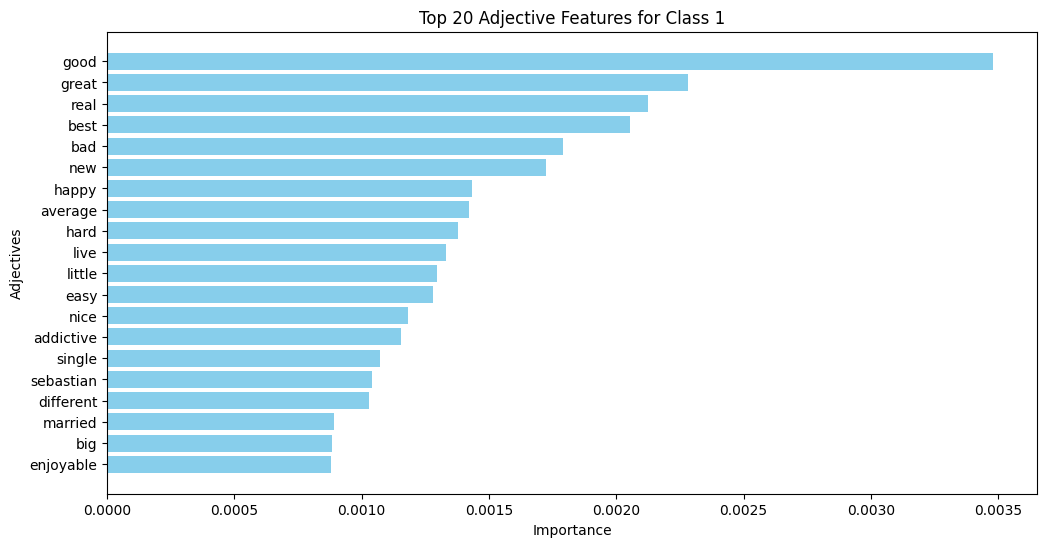

In [151]:
import pandas as pd

# Convert the adjective importance dictionary to a DataFrame
adjective_df = pd.DataFrame(list(adjective_word_importance.items()), columns=['Word', 'Importance'])

# Sort by importance and select the top N features
top_n = 20
top_adjectives = adjective_df.sort_values(by='Importance', ascending=False).head(top_n)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_adjectives['Word'], top_adjectives['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.xlabel('Importance')
plt.ylabel('Adjectives')
plt.title(f'Top {top_n} Adjective Features for Class {class_index}')
plt.show()